<a href="https://colab.research.google.com/github/nick01as/AI-ML-starter-kit/blob/main/eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TritonHacks 2025: Introduction to AI/ML Starter Kit Part I: Exploratory Data Analysis (EDA)

Welcome to the Intro to AI/ML Starter Kit for TritonHacks 2025! This is the first of two notebooks in this repo, and it focuses on EDA.

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Create a new file in drive named "AI-ML-StarterKit" and place the downloaded Kaggle dataset in the folder

In [2]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/AI-ML-StarterKit/healthcare-dataset-stroke-data.csv')
df.head()

Mounted at /content/drive


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Independent And Dependent Variables
df = pd.read_csv('/content/drive/MyDrive/AI-ML-StarterKit/healthcare-dataset-stroke-data.csv')

dependent_var = 'stroke'
independent_vars = [col for col in df.columns if col != dependent_var]

print("Target Output: ", dependent_var)
print("Feature Inputs: ", independent_vars)


Target Output:  stroke
Feature Inputs:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


<ipython-input-4-fb7152b6b7ce>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_rates = df.groupby('age_group')['stroke'].mean().reset_index()


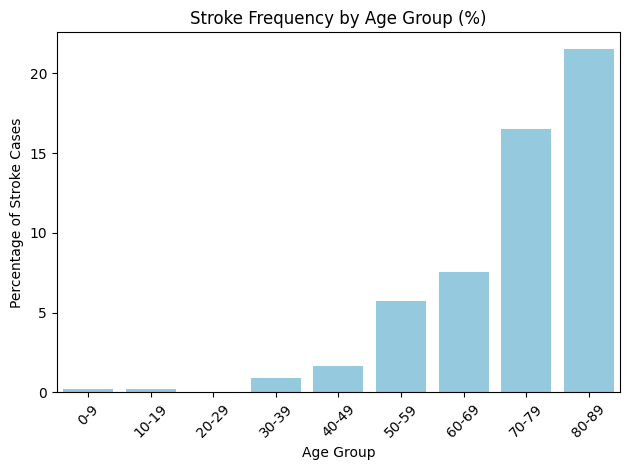

In [4]:
# Age v. Frequency Of Strokes

# Create age bins (0–10, 10–20, ..., 80–90)
bins = range(0, 91, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age_group and calculate stroke % per group
stroke_rates = df.groupby('age_group')['stroke'].mean().reset_index()
stroke_rates['stroke_percent'] = stroke_rates['stroke'] * 100

# Plot as bar chart
sns.barplot(data=stroke_rates, x='age_group', y='stroke_percent', color='skyblue')
plt.title('Stroke Frequency by Age Group (%)')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Stroke Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-5-4cb9dc5b1888>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')


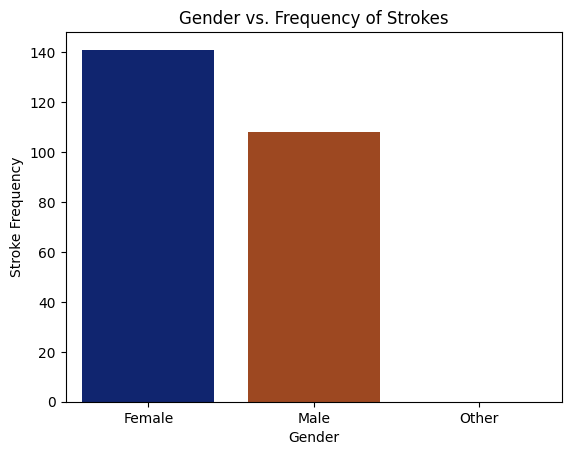

In [5]:

# Gender v. Frequency Of Strokes (Bar Graph)
grouped_data = df.groupby('gender')['stroke'].sum().reset_index()
sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')
plt.title('Gender vs. Frequency of Strokes')
plt.xlabel('Gender')
plt.ylabel('Stroke Frequency')
plt.show()

<ipython-input-6-a7cf62e1bdf8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')


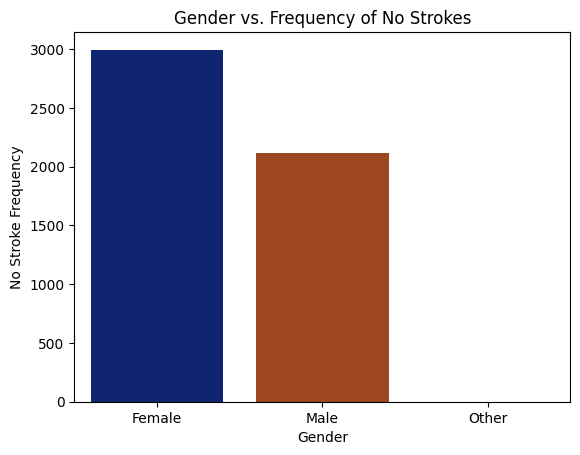

In [6]:
# Gender v. Frequency Of No Strokes (Bar Graph)

grouped_data = df.groupby('gender')['stroke'].count().reset_index()
sns.barplot(data=grouped_data, x='gender', y='stroke', palette = 'dark')
plt.title('Gender vs. Frequency of No Strokes')
plt.xlabel('Gender')
plt.ylabel('No Stroke Frequency')
plt.show()


<ipython-input-7-ff2778f25b3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='stroke', y='bmi', palette = 'dark')


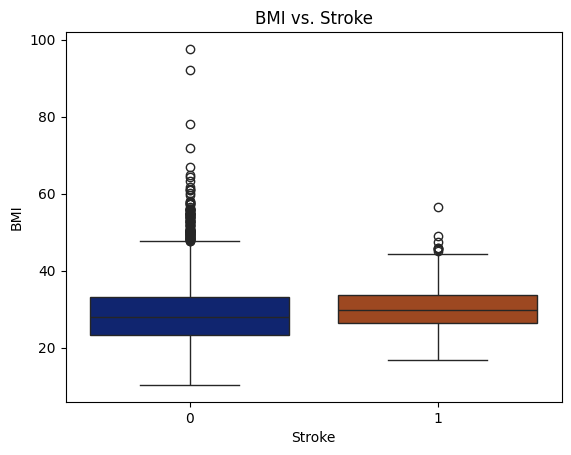

In [7]:
# Boxplot For BMI

sns.boxplot(data=df, x='stroke', y='bmi', palette = 'dark')
plt.title('BMI vs. Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

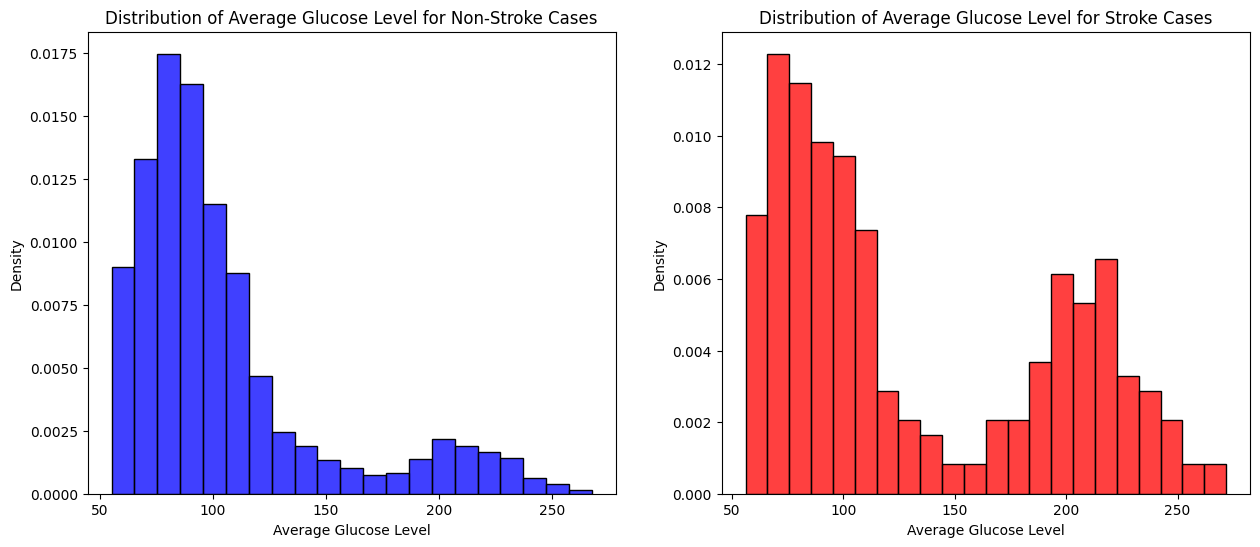

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.histplot(data = df.loc[df['stroke'] == 0], x = 'avg_glucose_level', stat = 'density', binwidth = 10, color = 'blue', ax = axes[0])
sns.histplot(data = df.loc[df['stroke'] == 1], x = 'avg_glucose_level', stat = 'density', binwidth = 10, color = 'red', ax = axes[1])

axes[1].set_title('Distribution of Average Glucose Level for Stroke Cases')
axes[1].set_xlabel('Average Glucose Level')
axes[1].set_ylabel('Density')

axes[0].set_title('Distribution of Average Glucose Level for Non-Stroke Cases')
axes[0].set_xlabel('Average Glucose Level')
axes[0].set_ylabel('Density')

plt.show()

<ipython-input-9-69bb11e70adc>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=stroke_data, x='age', y='avg_glucose_level', palette = 'dark')


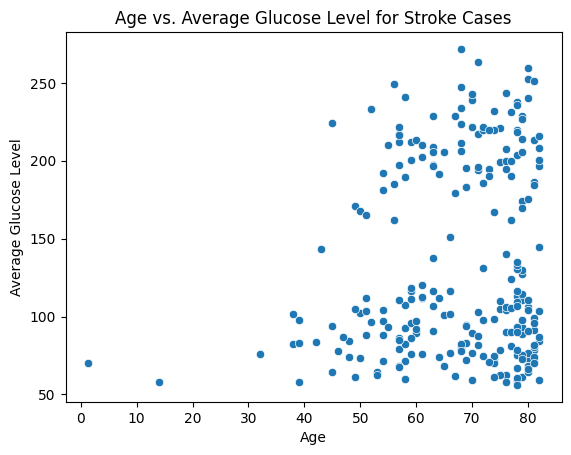

In [9]:
stroke_data = df.loc[df['stroke'] == 1]

sns.scatterplot(data=stroke_data, x='age', y='avg_glucose_level', palette = 'dark')
plt.title('Age vs. Average Glucose Level for Stroke Cases')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

<ipython-input-10-34c18dd400d8>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=age_minmax, y=glucose_minmax, palette = 'dark')


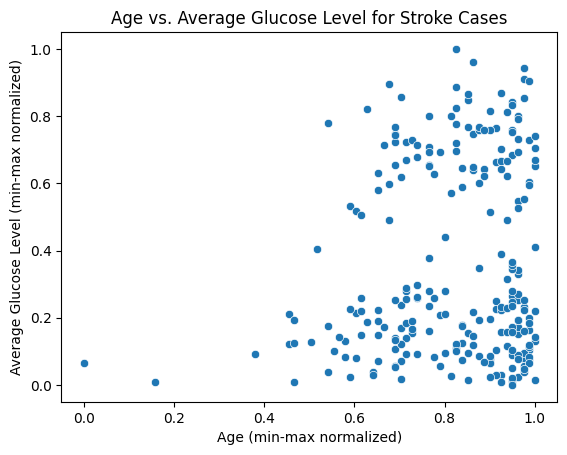

In [10]:
age_minmax = (stroke_data['age'] - stroke_data['age'].min()) / (stroke_data['age'].max() - stroke_data['age'].min())
glucose_minmax = (stroke_data['avg_glucose_level'] - stroke_data['avg_glucose_level'].min()) / (stroke_data['avg_glucose_level'].max() - stroke_data['avg_glucose_level'].min())
sns.scatterplot(x=age_minmax, y=glucose_minmax, palette = 'dark')

plt.title('Age vs. Average Glucose Level for Stroke Cases')
plt.xlabel('Age (min-max normalized)')
plt.ylabel('Average Glucose Level (min-max normalized)')
plt.show()

<ipython-input-11-cac549b8ff08>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=age_zscore, y=glucose_zscore, palette = 'dark')


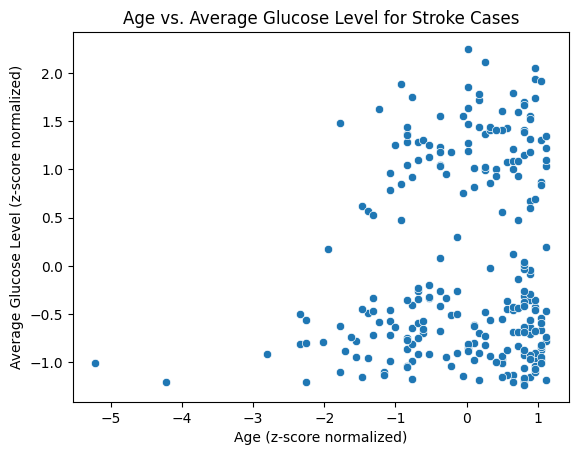

In [11]:
age_zscore = (stroke_data['age'] - stroke_data['age'].mean()) / stroke_data['age'].std()
glucose_zscore = (stroke_data['avg_glucose_level'] - stroke_data['avg_glucose_level'].mean()) / stroke_data['avg_glucose_level'].std()
sns.scatterplot(x=age_zscore, y=glucose_zscore, palette = 'dark')

plt.title('Age vs. Average Glucose Level for Stroke Cases')
plt.xlabel('Age (z-score normalized)')
plt.ylabel('Average Glucose Level (z-score normalized)')
plt.show()

In [12]:
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60-69
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1,50-59
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1,70-79
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,50-59
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0,40-49
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0,40-49
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0,40-49
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0,40-49


In [13]:
# Drop the age group column, since we already have an age column and it would be repetitive
df = df.drop(columns=['age_group'])

In [14]:
# Save data before OHE for some ML models that don't need it
df.to_csv('cleaned_data_no_ohe.csv', index=False)

Let's do group-wise median imputation for the `bmi` column since there are outliers in the `bmi` distribution among both stroke and non-stroke cases.

In [15]:
# One-hot encoding of Work

one_hot = pd.get_dummies(
    df,
    columns=['work_type', 'gender', 'smoking_status', 'Residence_type', 'ever_married'],
    prefix=['work', 'gender', 'smoking', 'Residence', 'marriage']
)
df = one_hot

In [16]:
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_Govt_job,work_Never_worked,work_Private,...,gender_Male,gender_Other,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban,marriage_No,marriage_Yes
0,9046,67.0,0,1,228.69,36.6,1,False,False,True,...,True,False,False,True,False,False,False,True,False,True
1,51676,61.0,0,0,202.21,NaN,1,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,31112,80.0,0,1,105.92,32.5,1,False,False,True,...,True,False,False,False,True,False,True,False,False,True
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,...,False,False,False,False,False,True,False,True,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,False,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,False,False,True,...,False,False,False,False,True,False,False,True,False,True
5106,44873,81.0,0,0,125.20,40.0,0,False,False,False,...,False,False,False,False,True,False,False,True,False,True
5107,19723,35.0,0,0,82.99,30.6,0,False,False,False,...,False,False,False,False,True,False,True,False,False,True
5108,37544,51.0,0,0,166.29,25.6,0,False,False,True,...,True,False,False,True,False,False,True,False,False,True


In [17]:
# Save data after OHE for some ML models that need it
df.to_csv('cleaned_data_ohe.csv', index=False)